___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 74s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

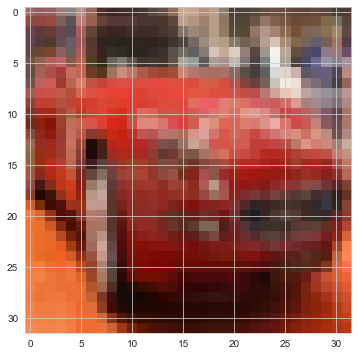

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [12]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
classes[y_train[0][0]]

'frog'

In [16]:
classes[int(y_train[0])]

'frog'

In [17]:
#int(np.random.randint(low=0, high=50000, size=1))

In [18]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

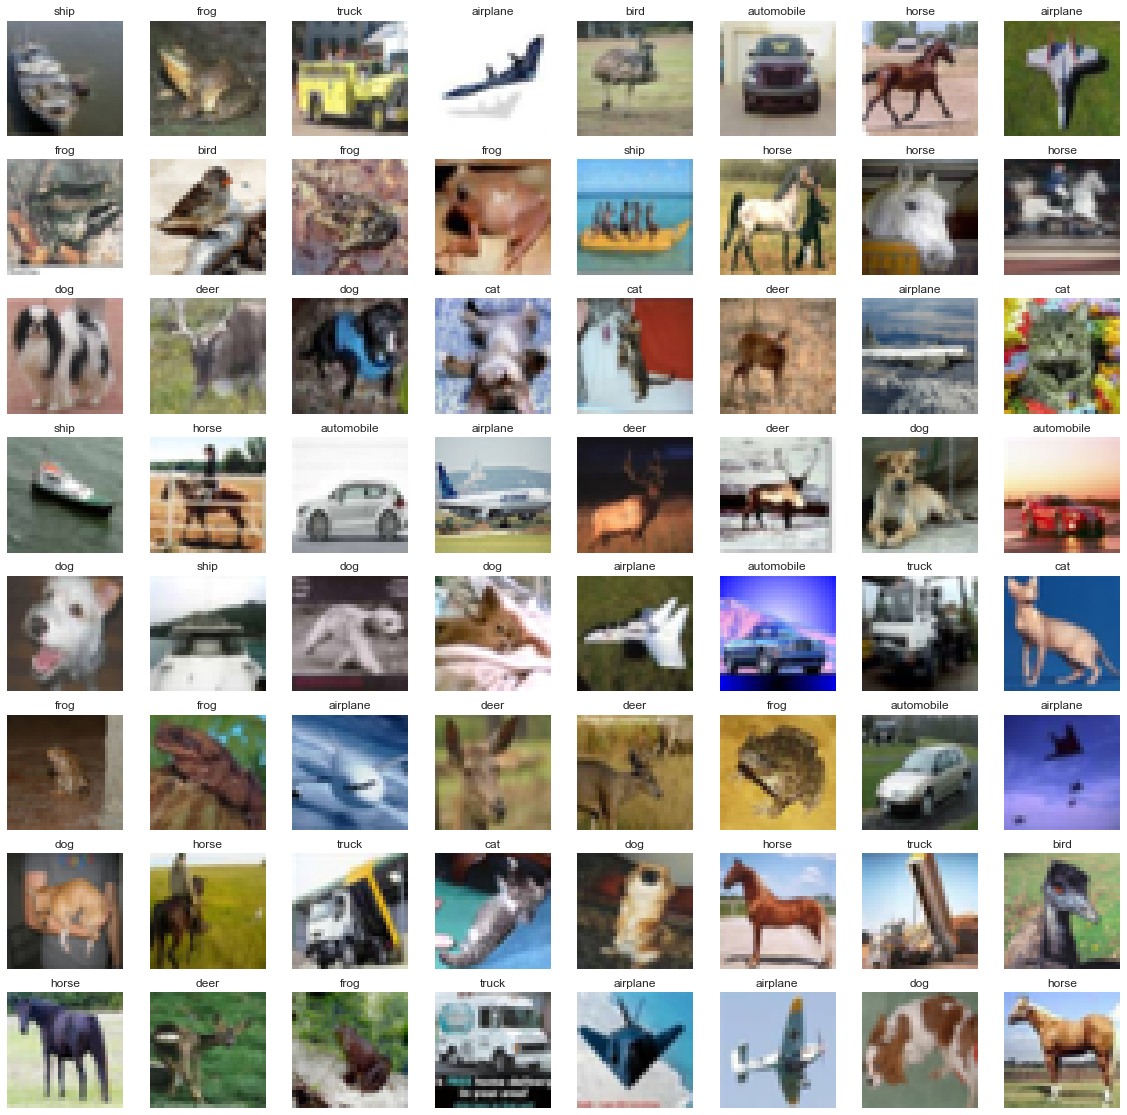

In [19]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

252

In [22]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

0.9882353

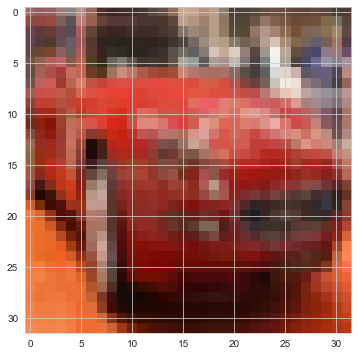

In [25]:
plt.imshow(X_train[5])

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [30]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4578 - accuracy: 0.4697 - val_loss: 1.1634 - val_accuracy: 0.5801
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0843 - accuracy: 0.6157 - val_loss: 1.0276 - val_accuracy: 0.6317
Epoch 3/50
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9444 - accuracy: 0.6655 - val_loss: 0.9765 - val_accuracy: 0.6652
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8491 - accuracy: 0.6992 - val_loss: 0.9852 - val_accuracy: 0.6590
Epoch 5/50
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7829 - accuracy: 0.7243 - val_loss: 0.8751 - val_accuracy: 0.6937
Epoch 6/50
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7149 - accuracy: 0.7478 - val_loss: 0.9113 - val_accuracy: 0.6877
Epoch 7/50
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6581 - accuracy: 0.7662 - val_loss: 0.9384 -

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.458,0.470,1.163,0.580
1,1.084,0.616,1.028,0.632
2,0.944,0.665,0.976,0.665
3,0.849,0.699,0.985,0.659
4,0.783,0.724,0.875,0.694


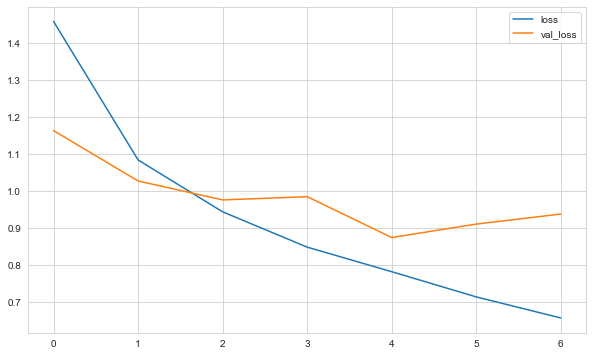

In [39]:
summary[["loss", "val_loss"]].plot();

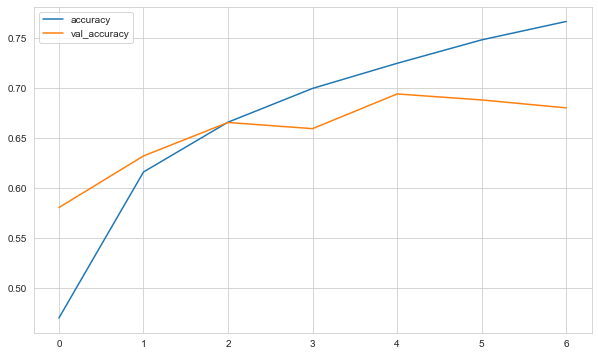

In [40]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8751 - accuracy: 0.6937


[0.8750820159912109, 0.6937000155448914]

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8750820159912109
Test accuracy: 0.6937000155448914


In [44]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [45]:
y_pred = np.argmax(pred_prob, axis=1)

In [46]:
y_pred

array([3, 8, 8, ..., 2, 1, 7], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.80      0.81      0.80      1000
           2       0.61      0.49      0.54      1000
           3       0.47      0.59      0.52      1000
           4       0.62      0.70      0.66      1000
           5       0.67      0.51      0.58      1000
           6       0.75      0.76      0.76      1000
           7       0.73      0.78      0.75      1000
           8       0.84      0.77      0.80      1000
           9       0.81      0.74      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [48]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [49]:
print(confusion_matrix(y_test, y_pred))

[[790  24  33  26  25   2  12  15  39  34]
 [ 23 808  10  14   3   4  11   6  33  88]
 [ 98   6 489  91 130  43  70  59   7   7]
 [ 26  15  72 588  74 114  56  38  11   6]
 [ 27   3  54  68 705  22  52  64   4   1]
 [ 14   8  54 260  56 510  23  61  11   3]
 [  4   4  43  97  54  15 763  10   8   2]
 [ 15   1  23  57  72  41   8 775   2   6]
 [102  43   9  23  14   2   7   9 765  26]
 [ 43  97  10  27   2   7  14  30  26 744]]


<AxesSubplot:>

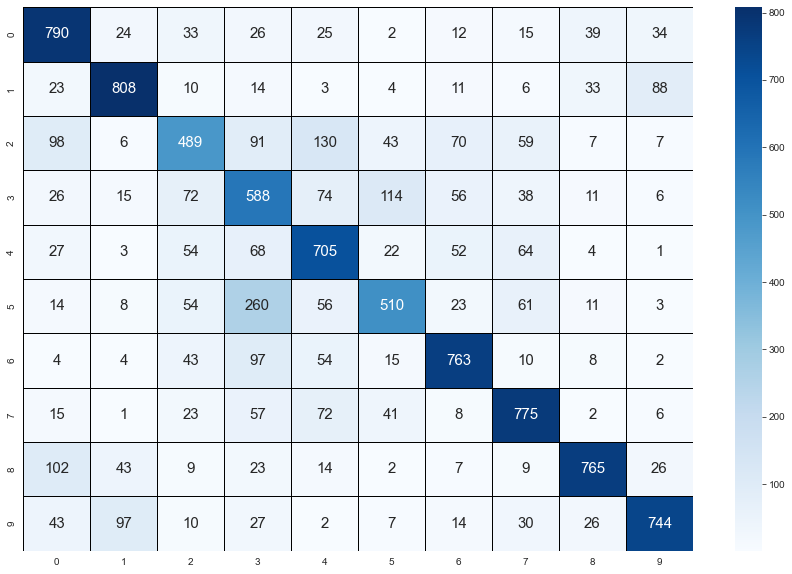

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [51]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [53]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 223s 142ms/step - loss: 1.4794 - accuracy: 0.4600 - val_loss: 1.1173 - val_accuracy: 0.5971
Epoch 2/50
1563/1563 [==============================] - 224s 143ms/step - loss: 1.0629 - accuracy: 0.6243 - val_loss: 0.9457 - val_accuracy: 0.6711
Epoch 3/50
1563/1563 [==============================] - 222s 142ms/step - loss: 0.9079 - accuracy: 0.6814 - val_loss: 0.8559 - val_accuracy: 0.7069
Epoch 4/50
1563/1563 [==============================] - 216s 138ms/step - loss: 0.8231 - accuracy: 0.7107 - val_loss: 0.8353 - val_accuracy: 0.7124
Epoch 5/50
1563/1563 [==============================] - 200s 128ms/step - loss: 0.7612 - accuracy: 0.7320 - val_loss: 0.7448 - val_accuracy: 0.7448
Epoch 6/50
1563/1563 [==============================] - 194s 124ms/step - loss: 0.7158 - accuracy: 0.7482 - val_loss: 0.7776 - val_accuracy: 0.7307
Epoch 7/50
1563/1563 [==============================] - 189s 121ms/step - loss: 0.6747 - accuracy: 0.7636 - val_

In [54]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.479,0.460,1.117,0.597
1,1.063,0.624,0.946,0.671
2,0.908,0.681,0.856,0.707
3,0.823,0.711,0.835,0.712
4,0.761,0.732,0.745,0.745


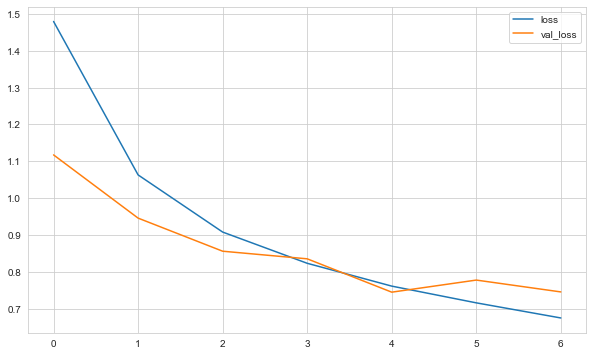

In [55]:
summary[["loss", "val_loss"]].plot();

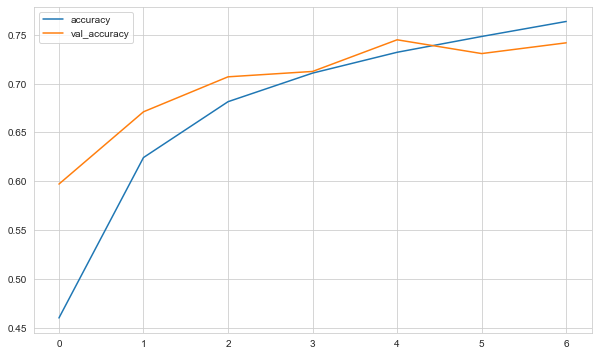

In [56]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [57]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.7448 - accuracy: 0.7448


[0.7447605729103088, 0.7447999715805054]

In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7447605729103088
Test accuracy: 0.7447999715805054


In [59]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 9s 28ms/step


In [60]:
y_pred = np.argmax(pred_prob, axis=1)

In [61]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1000
           1       0.88      0.85      0.86      1000
           2       0.66      0.57      0.61      1000
           3       0.58      0.54      0.56      1000
           4       0.64      0.77      0.70      1000
           5       0.73      0.59      0.65      1000
           6       0.73      0.87      0.80      1000
           7       0.82      0.77      0.79      1000
           8       0.80      0.89      0.84      1000
           9       0.80      0.86      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



<AxesSubplot:>

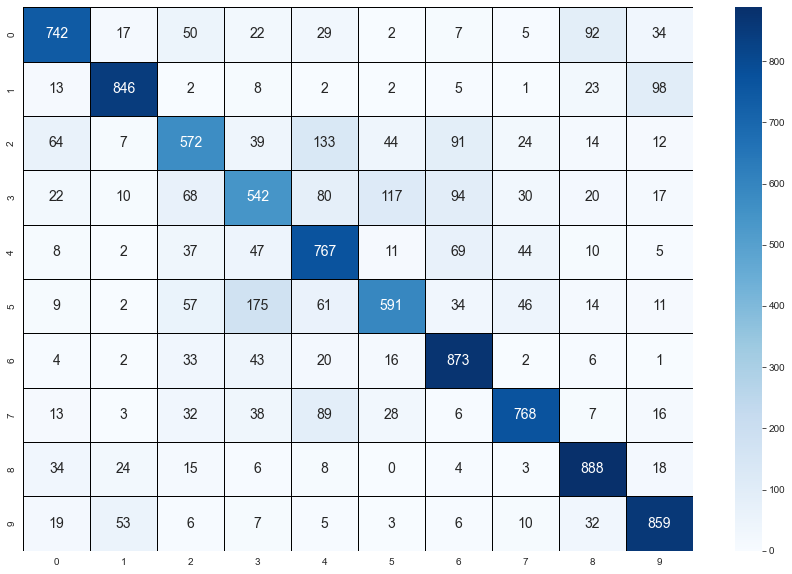

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [64]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [65]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [66]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [68]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 392s 249ms/step - loss: 1.9323 - accuracy: 0.3110 - val_loss: 1.8098 - val_accuracy: 0.3507
Epoch 2/50
1563/1563 [==============================] - 424s 271ms/step - loss: 1.4371 - accuracy: 0.4838 - val_loss: 1.3532 - val_accuracy: 0.5377
Epoch 3/50
1563/1563 [==============================] - 424s 271ms/step - loss: 1.2410 - accuracy: 0.5700 - val_loss: 1.1395 - val_accuracy: 0.5969
Epoch 4/50
1563/1563 [==============================] - 399s 255ms/step - loss: 1.1118 - accuracy: 0.6203 - val_loss: 1.2163 - val_accuracy: 0.5941
Epoch 5/50
1563/1563 [==============================] - 387s 247ms/step - loss: 1.0105 - accuracy: 0.6585 - val_loss: 0.8039 - val_accuracy: 0.7192
Epoch 6/50
1563/1563 [==============================] - 392s 251ms/step - loss: 0.9435 - accuracy: 0.6888 - val_loss: 0.7467 - val_accuracy: 0.7460
Epoch 7/50
1563/1563 [==============================] - 386s 247ms/step - loss: 0.8798 - accuracy: 0.7107 - val_

In [69]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.932,0.311,1.810,0.351
1,1.437,0.484,1.353,0.538
2,1.241,0.570,1.140,0.597
3,1.112,0.620,1.216,0.594
4,1.011,0.658,0.804,0.719


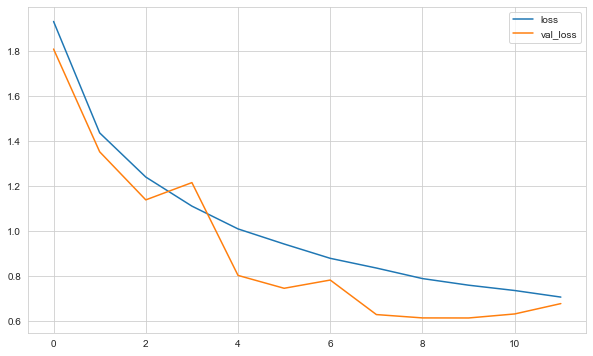

In [70]:
summary[["loss", "val_loss"]].plot();

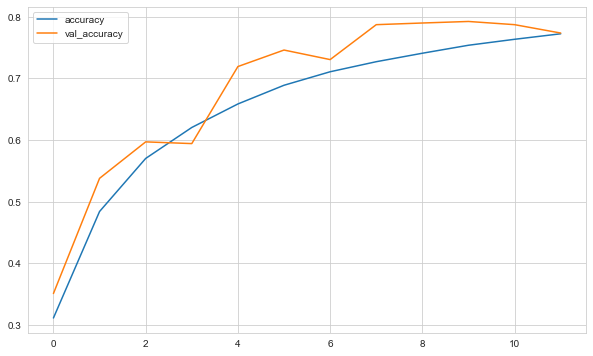

In [71]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [72]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 13s 43ms/step - loss: 0.6148 - accuracy: 0.7924


[0.6148010492324829, 0.7924000024795532]

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6148010492324829
Test accuracy: 0.7924000024795532


In [74]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 15s 46ms/step


In [75]:
y_pred = np.argmax(pred_prob, axis=1)

In [76]:
y_pred

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1000
           1       0.94      0.84      0.89      1000
           2       0.77      0.66      0.71      1000
           3       0.63      0.65      0.64      1000
           4       0.69      0.88      0.77      1000
           5       0.78      0.63      0.70      1000
           6       0.76      0.92      0.83      1000
           7       0.84      0.85      0.84      1000
           8       0.88      0.89      0.88      1000
           9       0.81      0.93      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



<AxesSubplot:>

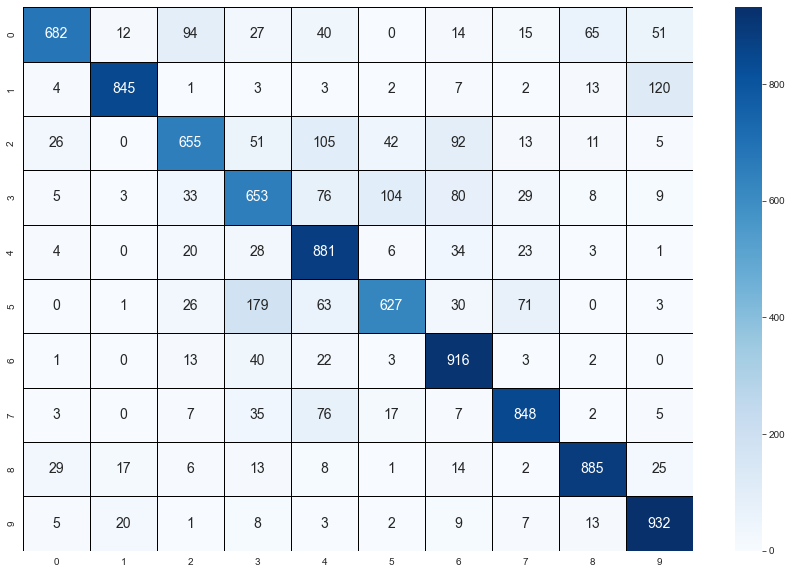

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [79]:
my_image = X_test[44]

In [80]:
my_image.shape

(32, 32, 3)

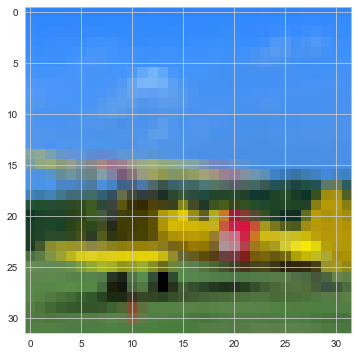

In [81]:
plt.imshow(my_image)

In [82]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 34ms/step


In [83]:
image_prediction

array([[9.7775364e-01, 1.6058525e-03, 4.1620461e-03, 6.2953116e-04,
        1.6670149e-03, 1.7354409e-04, 1.3881235e-04, 9.6522993e-04,
        5.1592831e-03, 7.7451780e-03]], dtype=float32)

In [84]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [85]:
result=np.argmax(image_prediction, axis=1)

In [86]:
result

array([0], dtype=int64)

In [87]:
classes[int(result)]

'airplane'

In [88]:
model.save("cnn-1.h5")

In [89]:
#finished

In [90]:
model=tf.keras.models.load_model('cnn-1.h5')

In [91]:
X_test[15].shape

(32, 32, 3)

In [92]:
# np.expand_dims(X_test[15],axis=0).shape

In [93]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 272ms/step


In [94]:
np.argmax(pred)

8

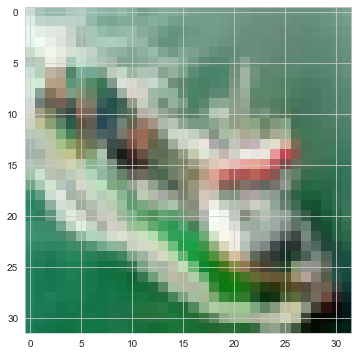

In [95]:
plt.imshow(X_test[15])

In [96]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']